# Árvore de decisão


Ilustra o funcionamento do algoritmo de árvore de decisão com dados contínuos.

-------------------------------------------------------------------------------

### Base de dados: Sonar, Mines vs. Rocks

https://archive.ics.uci.edu/ml/datasets/Connectionist+Bench+%28Sonar,+Mines+vs.+Rocks%29

208 instâncias

60 atributos

2 classes (rocha, mina)



In [20]:
%pip install pydotplus
%pip install dtreeviz
%pip install pandas
%pip install numpy
%pip install sklearn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of yo

In [21]:
import pandas as pd
import numpy as np
from sklearn import datasets, tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_extraction import DictVectorizer
from sklearn.preprocessing import LabelEncoder

### Carga dos dados e particionamento das bases de treinamento e teste

### Transformação de dados

A classe é convertida para labels únicos sequenciais.

<code>
 le = preprocessing.LabelEncoder()
  
 le.fit(dados)
</code>


### Particionamento da base

<code>train_test_split(X, y) -- particiona a base de dados original em bases de treinamento e teste.</code>

No código a seguir, são utilizados 10% para teste e 90% para treinamento.







In [22]:
sonar = pd.read_csv("./data/sonar.csv", sep=";", decimal=',')
print("\nDimensões: {0}".format(sonar.shape))
print("\nCampos: {0}".format(sonar.keys()))

X = sonar.iloc[:,0:(sonar.shape[1] - 1)]

le = LabelEncoder()
y = le.fit_transform(sonar.iloc[:,(sonar.shape[1] - 1)])

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.15)


Dimensões: (208, 61)

Campos: Index(['Atributo_1', 'Atributo_2', 'Atributo_3', 'Atributo_4', 'Atributo_5',
       'Atributo_6', 'Atributo_7', 'Atributo_8', 'Atributo_9', 'Atributo_10',
       'Atributo_11', 'Atributo_12', 'Atributo_13', 'Atributo_14',
       'Atributo_15', 'Atributo_16', 'Atributo_17', 'Atributo_18',
       'Atributo_19', 'Atributo_20', 'Atributo_21', 'Atributo_22',
       'Atributo_23', 'Atributo_24', 'Atributo_25', 'Atributo_26',
       'Atributo_27', 'Atributo_28', 'Atributo_29', 'Atributo_30',
       'Atributo_31', 'Atributo_32', 'Atributo_33', 'Atributo_34',
       'Atributo_35', 'Atributo_36', 'Atributo_37', 'Atributo_38',
       'Atributo_39', 'Atributo_40', 'Atributo_41', 'Atributo_42',
       'Atributo_43', 'Atributo_44', 'Atributo_45', 'Atributo_46',
       'Atributo_47', 'Atributo_48', 'Atributo_49', 'Atributo_50',
       'Atributo_51', 'Atributo_52', 'Atributo_53', 'Atributo_54',
       'Atributo_55', 'Atributo_56', 'Atributo_57', 'Atributo_58',
       'At

In [23]:
sonar.describe()

,Atributo_1,Atributo_2,Atributo_3,Atributo_4,Atributo_5,Atributo_6,Atributo_7,Atributo_8,Atributo_9,Atributo_10,...,Atributo_51,Atributo_52,Atributo_53,Atributo_54,Atributo_55,Atributo_56,Atributo_57,Atributo_58,Atributo_59,Atributo_60
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


### Indução do Modelo


Os três passos para indução de um modelo são:

1.   Instanciar o modelo: ``` DecisionTreeClassifier()```
2.   Treinar o modelo: ```fit()```
3.   Testar o modelo: ```predict()```



In [24]:
sonar['Atributo_1'].dtype

dtype('float64')

In [25]:
sonar_tree = DecisionTreeClassifier(random_state=0, criterion='entropy')
sonar_tree = sonar_tree.fit(X_train, y_train)
print("Acc (train):", sonar_tree.score(X_train, y_train))

y_pred = sonar_tree.predict(X_test)
print("Acc (test):", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=["Mina", "Rocha"]))
      
cnf_matrix = confusion_matrix(y_test, y_pred)
cnf_table = pd.DataFrame(data=cnf_matrix, index=["Mina", "Rocha"], columns=["Mina (prev)", "Rocha (prev)"])
print(cnf_table)


Acc (train): 1.0
Acc (test): 0.75
              precision    recall  f1-score   support

        Mina       0.69      0.79      0.73        14
       Rocha       0.81      0.72      0.76        18

    accuracy                           0.75        32
   macro avg       0.75      0.75      0.75        32
weighted avg       0.76      0.75      0.75        32

       Mina (prev)  Rocha (prev)
Mina            11             3
Rocha            5            13


### Exibição da árvore de decisão

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
/home/aggioxx/anaconda3/envs/pg-ml/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid featur

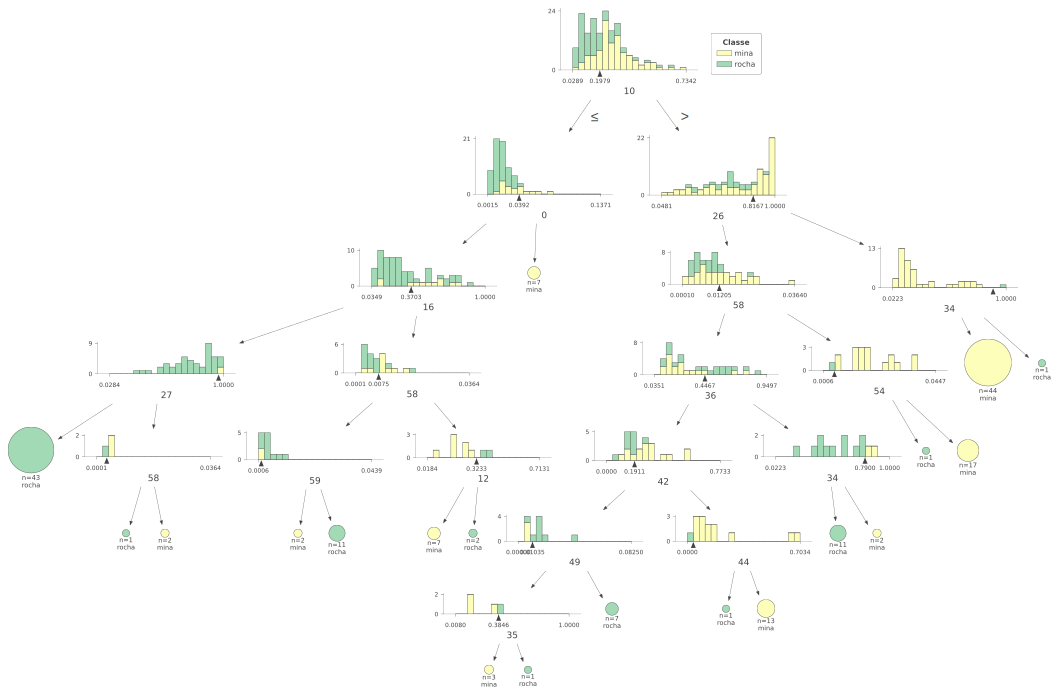

In [26]:
import dtreeviz as viz

my_tree = viz.model(sonar_tree,
              X_train,
              y_train,
              target_name="Classe",
              feature_names=np.arange(0,60),
              class_names=["mina", "rocha"])  

my_tree.view()